# Analítica Avanzada de Datos.
---
**Alumnos:**

-Maravilla Pérez Vianey

-Mondolla Cervantes Erin

-Ramírez Mendez Kevin

# Practica 4

Los expertos en vino pueden identificar vinos de viñedos específicos a través del olfato y el gusto, pero los factores que confieren a los distintos vinos sus características individuales se basan en realidad en su composición química.

En esta práctica, deben entrenar un modelo de clasificación para analizar las características químicas y visuales de las muestras de vino y clasificarlas en función de su cultivar (variedad de uva).

> **Cita**: Este dataset le pertenece a Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explorar los datos

Ejecuten la siguiente celda para cargar un archivo CSV de datos de vino, que consta de 12 características numéricas y una etiqueta de clasificación con las siguientes clases:

- **0** (*variedad A*)
- **1** (*variedad B*)
- **2** (*variedad C*)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib
%pylab inline
pylab.style.use('ggplot')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Cargando el dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
data = pd.read_csv(url, header=None)
data.sample(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
155,3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
109,2,11.61,1.35,2.70,20.0,94,2.74,2.92,0.29,2.49,2.65,0.96,3.26,680
124,2,11.87,4.31,2.39,21.0,82,2.86,3.03,0.21,2.91,2.80,0.75,3.64,380
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675
88,2,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680
15,1,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310


In [3]:
#Nombrando las columnas
cols = """Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline""".split('\n')

cols = [c.replace(' ', '_') for c in cols]

data.columns = ['target'] + cols
data.sample(5)

,target,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
49,1,13.94,1.73,2.27,17.4,108,2.88,3.54,0.32,2.08,8.90,1.12,3.10,1260
167,3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
60,2,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680
84,2,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
13,1,14.75,1.73,2.39,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150


In [4]:
#Verificando si cuenta con valores nulos
data.isnull().sum()

target                          0
Alcohol                         0
Malic_acid                      0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

In [5]:
data.describe()

,target,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


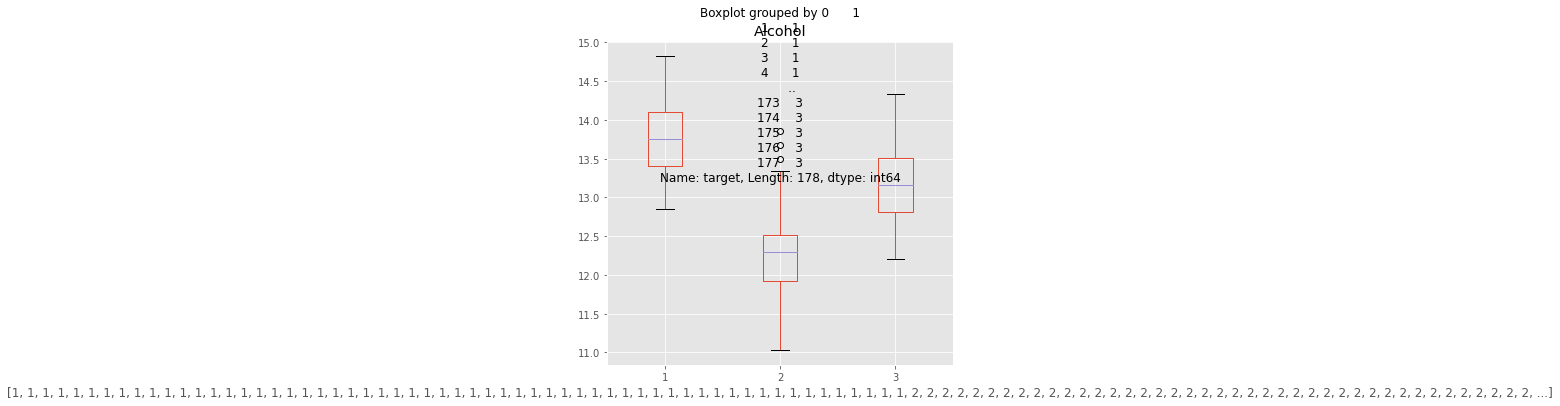

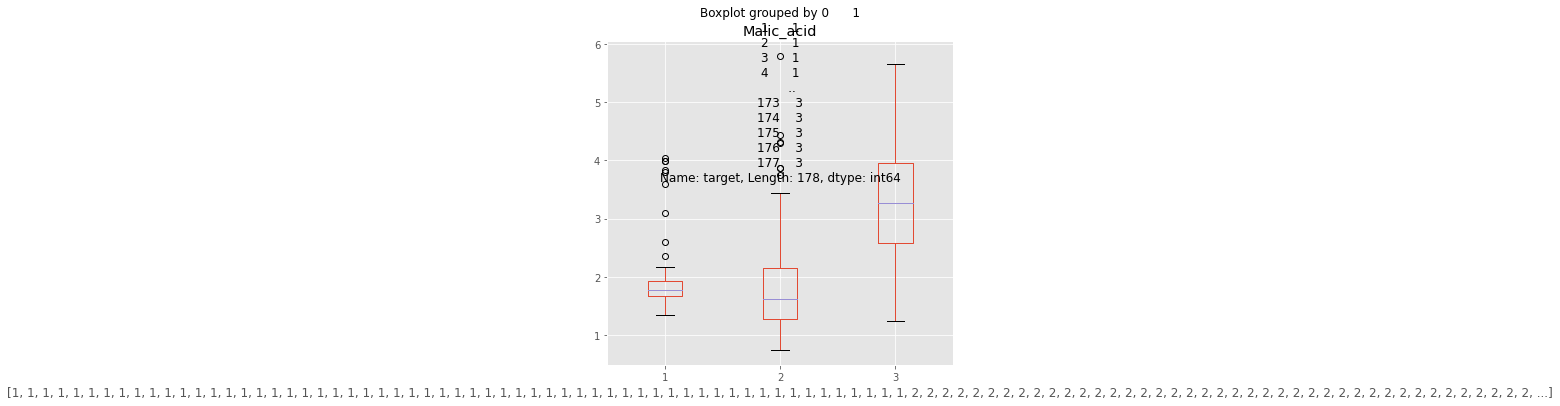

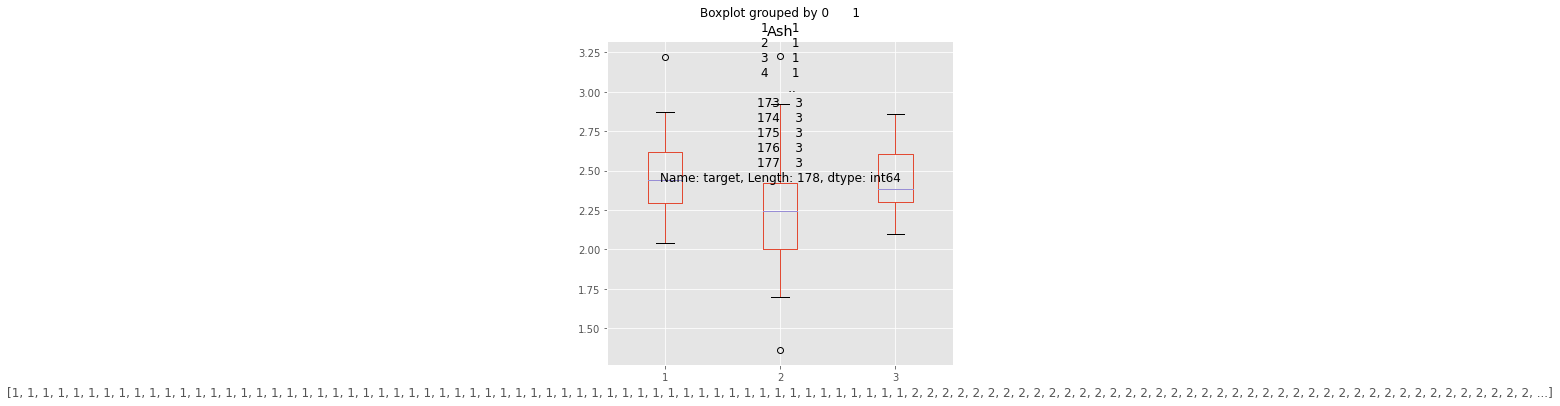

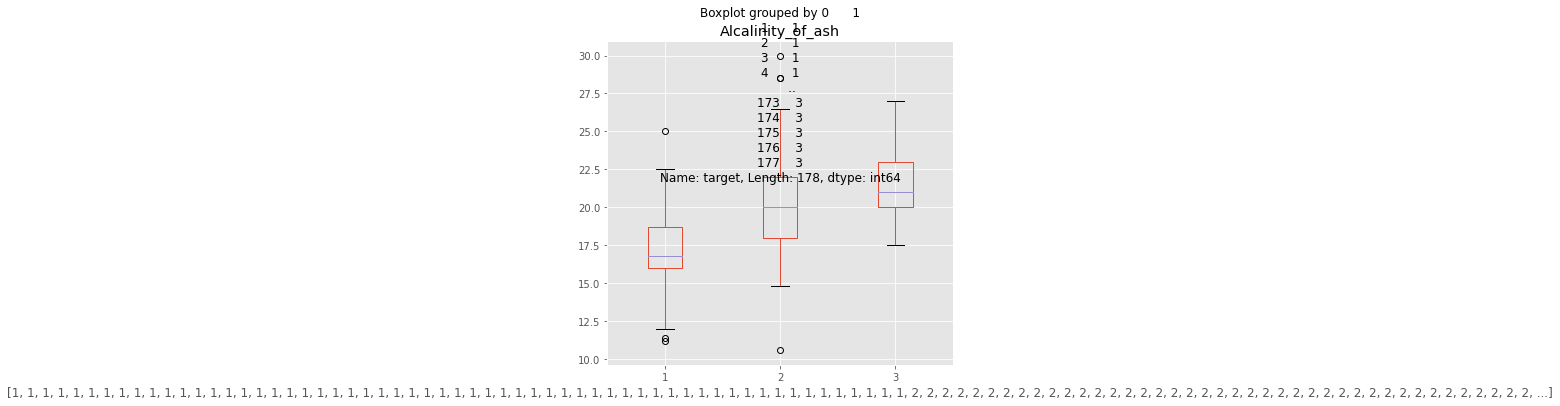

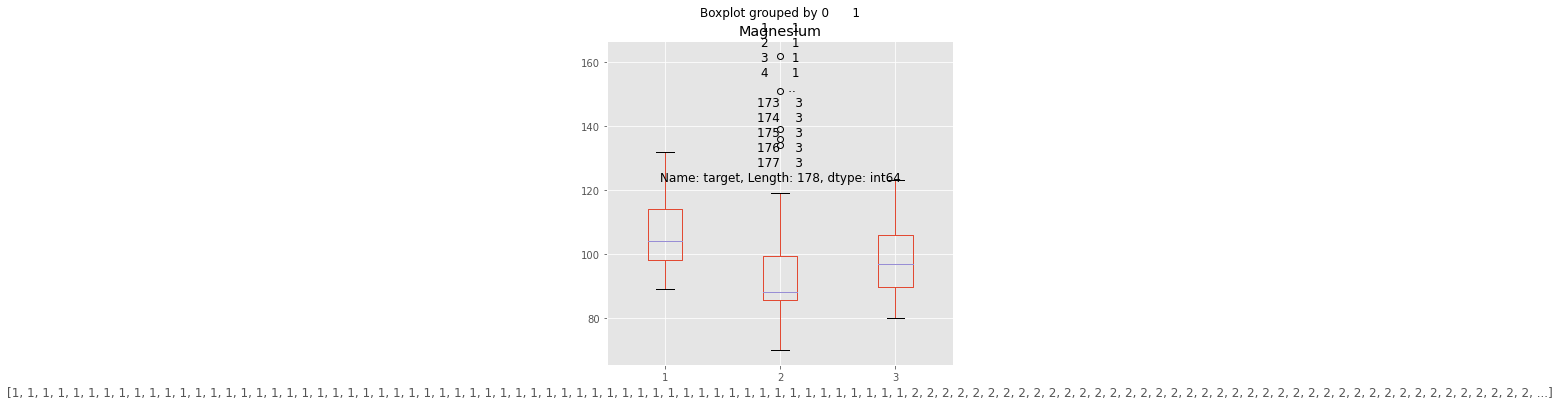

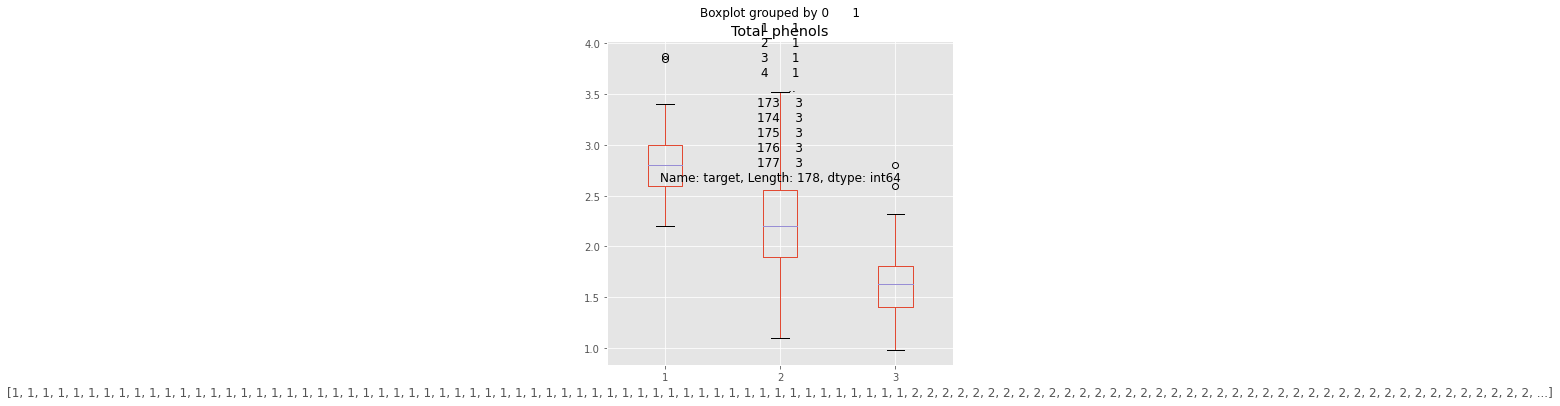

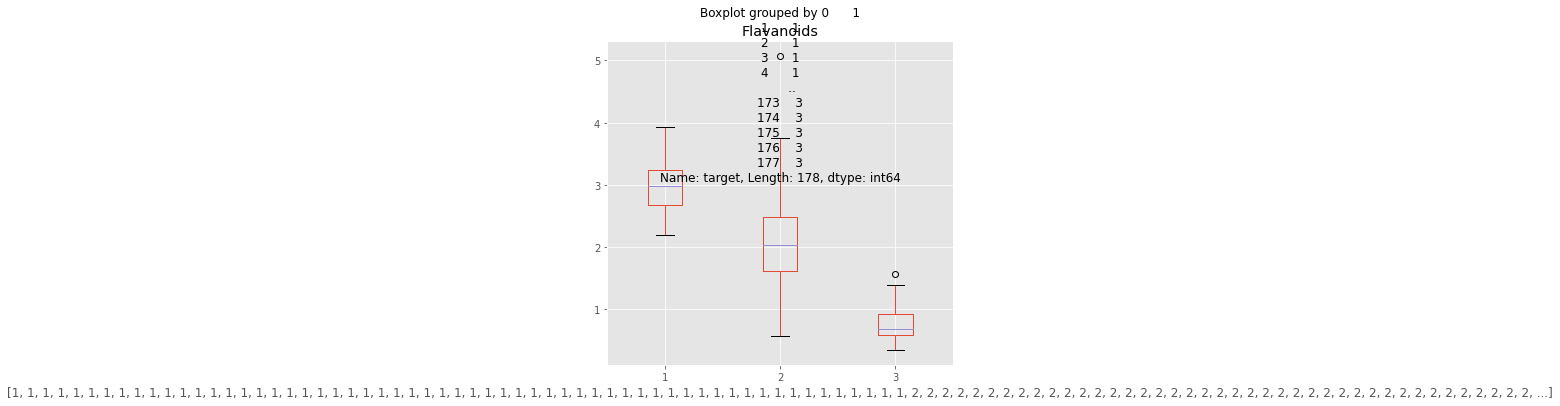

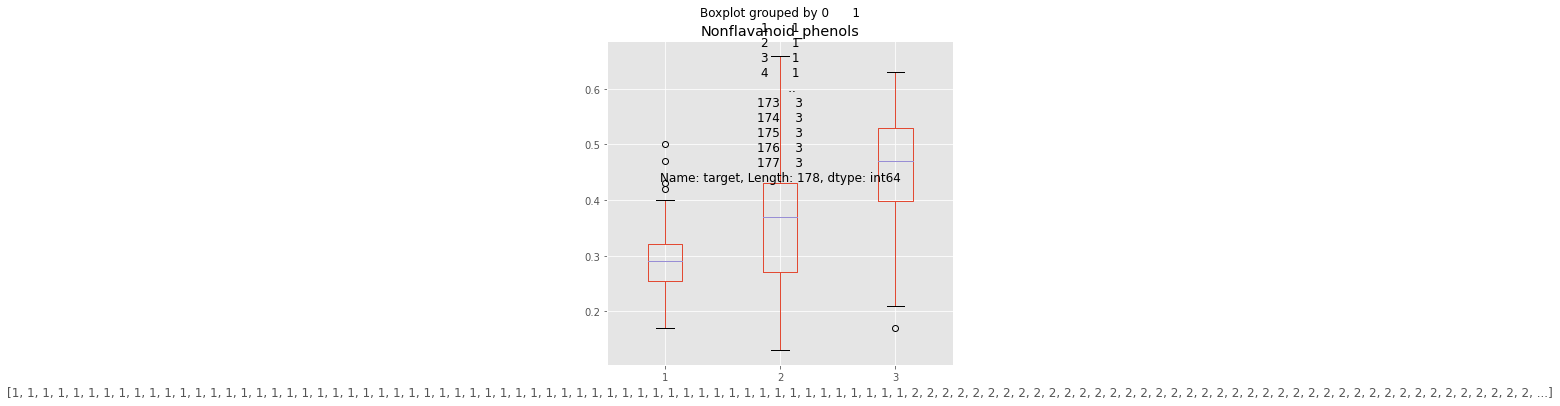

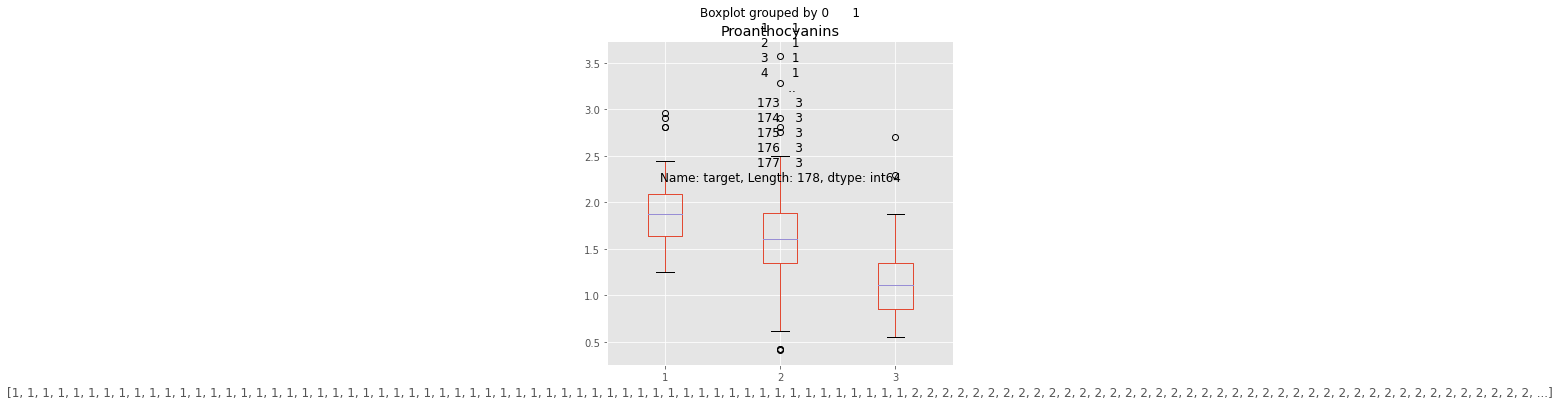

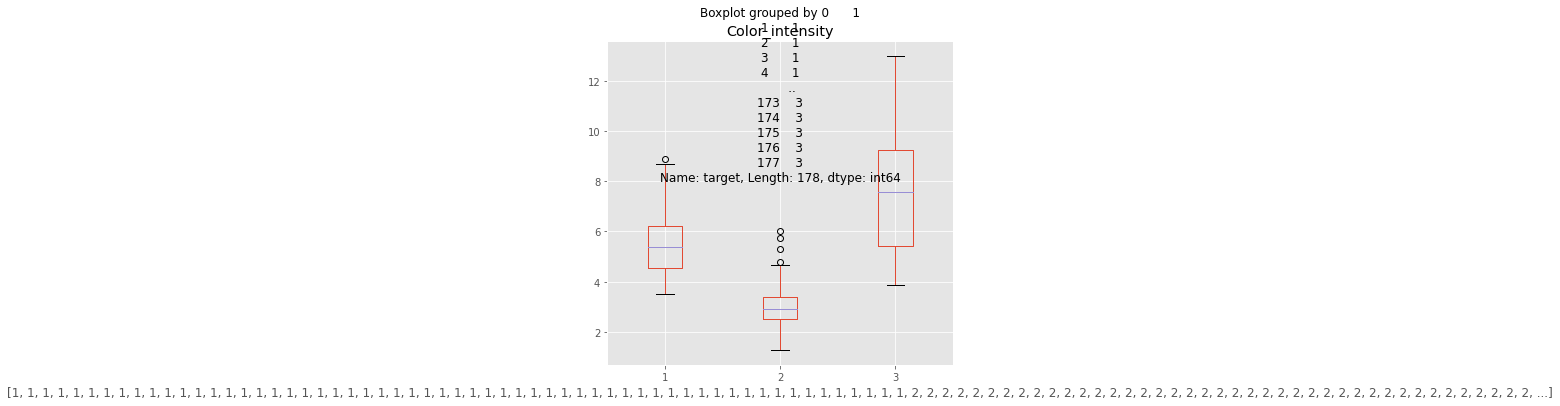

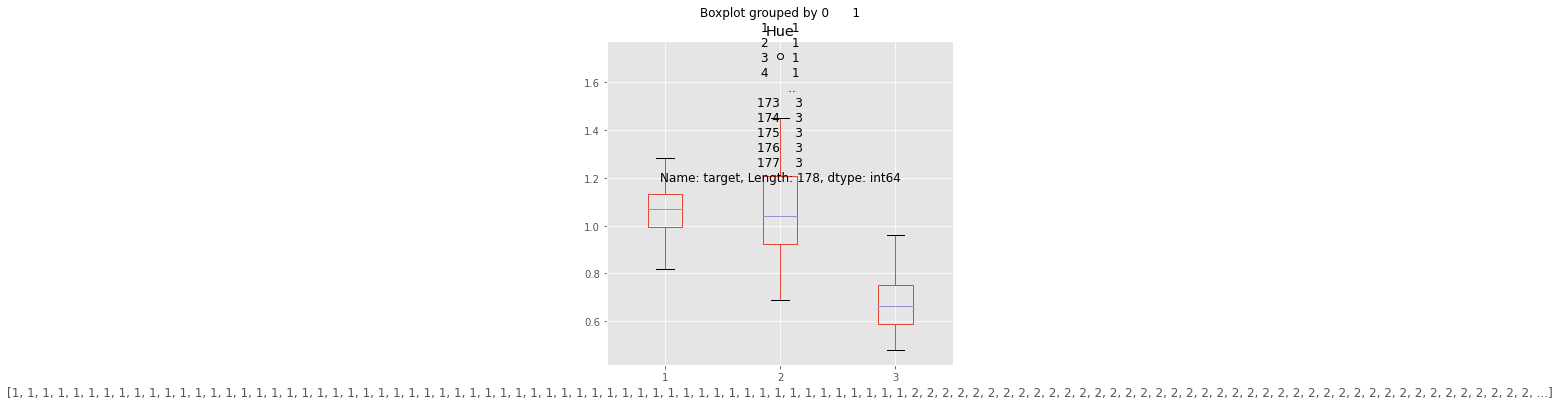

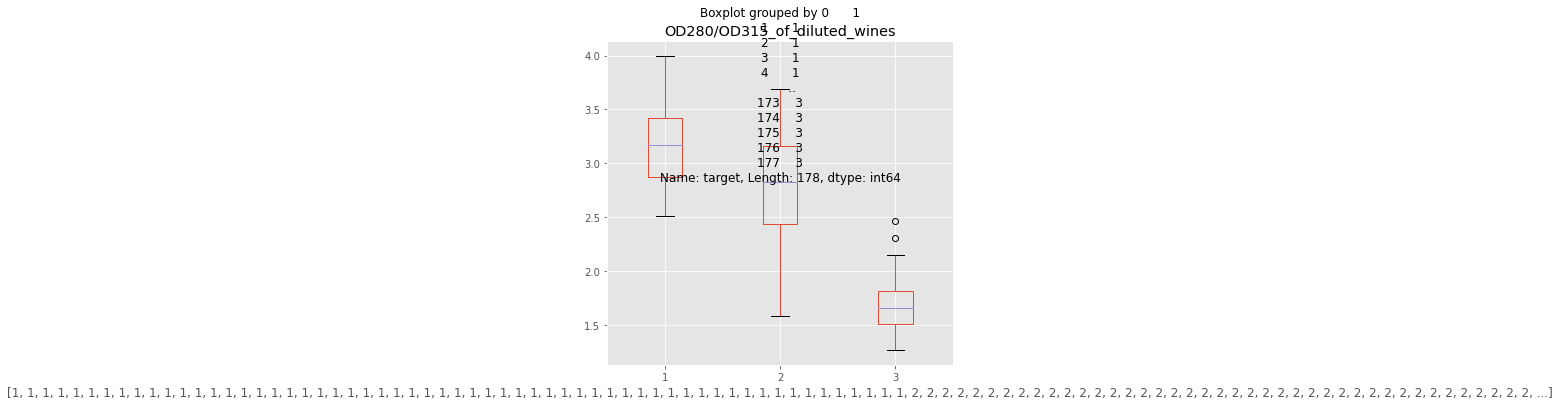

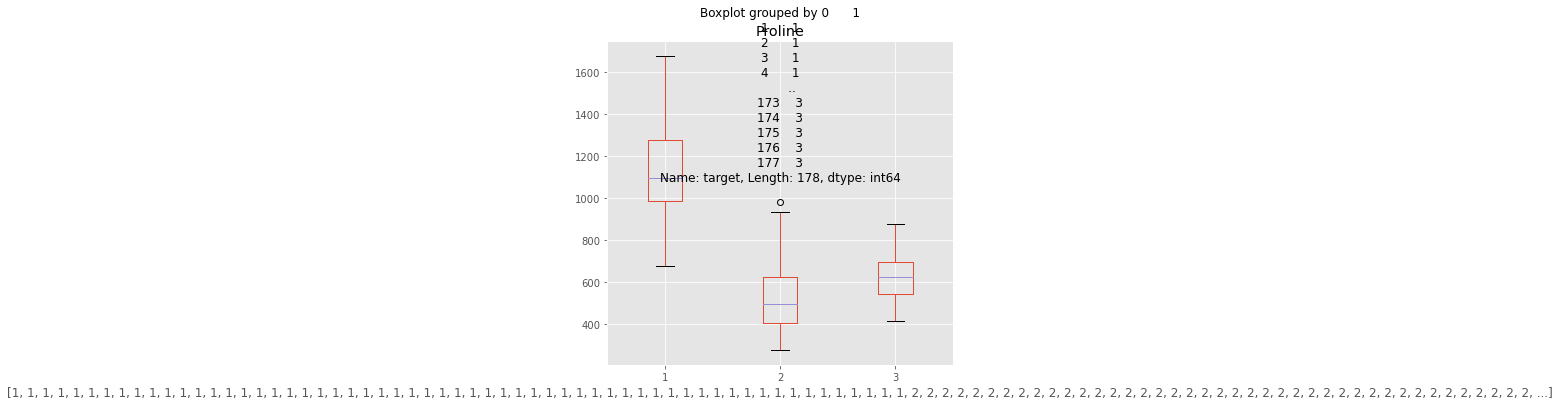

In [6]:
features = data.drop('target', axis=1)
target = data['target']
for col in features:
    data.boxplot(column=col, by=target, figsize=(6,6))
    plt.title(col)
plt.show()

> **La práctica consiste en explorar los datos y entrenar un modelo de clasificación que alcance una métrica Recall global superior a 0.95 (95%)**

## Entrenar y evaluar un modelo

Añada las celdas de código y celdas necesarias para explorar los datos, entrenar un modelo y evaluar el rendimiento predictivo del modelo.

In [7]:
#Dividir los datos en conjuntos de entrenamiento y prueba: 70-30
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

print ('Training Set: %d, Test Set: %d \n' % (X_train.shape[0], y_test.shape[0]))

Training Set: 124, Test Set: 54 



In [8]:
#Normalizar los datos para asegurar que todas las características estén en la misma escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
#Entrenar el modelo de regresión logistica
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [10]:
#Utilizando el modelo entrenado para predecir las etiquetas de las características de prueba y comparar las clases predichas con las clases reales
predictions = model.predict(X_test_scaled)
print('Predicted labels: ', predictions[:15])
print('Actual labels   : ' , y_test[:15])

Predicted labels:  [1 1 3 1 2 1 2 3 2 3 1 3 1 2 1]
Actual labels   :  19     1
45     1
140    3
30     1
67     2
16     1
119    2
174    3
109    2
141    3
24     1
150    3
41     1
118    2
15     1
Name: target, dtype: int64


In [11]:
#Realiza predicciones en el conjunto de prueba y evalúa el rendimiento del modelo utilizando la métrica Recall.
y_pred = model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [12]:
#obtener las métricas globales
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

Overall Accuracy: 0.9814814814814815
Overall Precision: 0.9777777777777779
Overall Recall: 0.9841269841269842


**Podemos observar que en general nuestro modelo hizo un excelente trabajo, y se obtuvo un Recall global superior a 0.95 (95%) siendo del 0.98.**

## Prueben su modelo con datos desconocidos

Cuando estén satisfecho con el rendimiento predictivo de su modelo, guárdenlo y utilícenlo para predecir las clases de las dos nuevas muestras de vino siguientes:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [13]:
#Guardar el modelo en un archivo pickle
joblib.dump(model, 'modelo_entrenado.pkl')

['modelo_entrenado.pkl']

In [14]:
#Cargar el modelo desde el archivo
loaded_model = joblib.load('modelo_entrenado.pkl')

In [16]:
#Primera muestra con datos nuevos
primeros_datos = [[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285]]
print('New sample: {}'.format(primeros_datos))

#Normalizar los nuevos datos
primeros_datos_scaled = scaler.transform(primeros_datos)

#Realizar predicciones con el modelo cargado
predicciones = loaded_model.predict(primeros_datos_scaled)

#Imprimir las predicciones
print('Predicted class is', predicciones)

New sample: [[13.72, 1.43, 2.5, 16.7, 108, 3.4, 3.67, 0.19, 2.04, 6.8, 0.89, 2.87, 1285]]
Predicted class is [1]


C:\Users\erin_\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
#Segunda muestra con datos nuevos
segundos_datos = [[12.37, 0.94, 1.36, 10.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.82, 520]]
print('New sample: {}'.format(segundos_datos))

#Normalizar los nuevos datos
segundos_datos_scaled = scaler.transform(segundos_datos)

#Realizar predicciones con el modelo cargado
predicciones = loaded_model.predict(segundos_datos_scaled)

#Imprimir las predicciones
print('Predicted class is', predicciones)

New sample: [[12.37, 0.94, 1.36, 10.6, 88, 1.98, 0.57, 0.28, 0.42, 1.95, 1.05, 1.82, 520]]
Predicted class is [2]


C:\Users\erin_\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Para finalizar, podemos decir que en general el modelo de clasificación fue bastante bueno, pero se debe tomar en cuenta que es un dataset muy pequeño.**